# Problem 1: Clustering

## A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

### Data Dictionary for Market Segmentation:

    spending: Amount spent by the customer per month (in 1000s)
    advance_payments: Amount paid by the customer in advance by cash (in 100s)
    probability_of_full_payment: Probability of payment done in full by the customer to the bank
    current_balance: Balance amount left in the account to make purchases (in 1000s)
    credit_limit: Limit of the amount in credit card (10000s)
    min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
    max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

In [2]:
df=pd.read_csv('bank_marketing_part1_Data-1.csv')

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.shape

(210, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [8]:
df.sample(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
34,11.82,13.40,0.8274,5.314,2.777,4.4710,5.178
71,12.49,13.46,0.8658,5.267,2.967,4.4210,5.002
63,15.26,14.85,0.8696,5.714,3.242,4.5430,5.314
96,19.57,16.74,0.8779,6.384,3.772,1.4720,6.273
46,13.16,13.82,0.8662,5.454,2.975,0.8551,5.056
154,11.42,12.86,0.8683,5.008,2.850,2.7000,4.607
169,11.43,13.13,0.8335,5.176,2.719,2.2210,5.132
52,19.46,16.50,0.8985,6.113,3.892,4.3080,6.009
78,16.82,15.51,0.8786,6.017,3.486,4.0040,5.841
87,15.38,14.90,0.8706,5.884,3.268,4.4620,5.795


In [9]:
df.duplicated().sum()

0

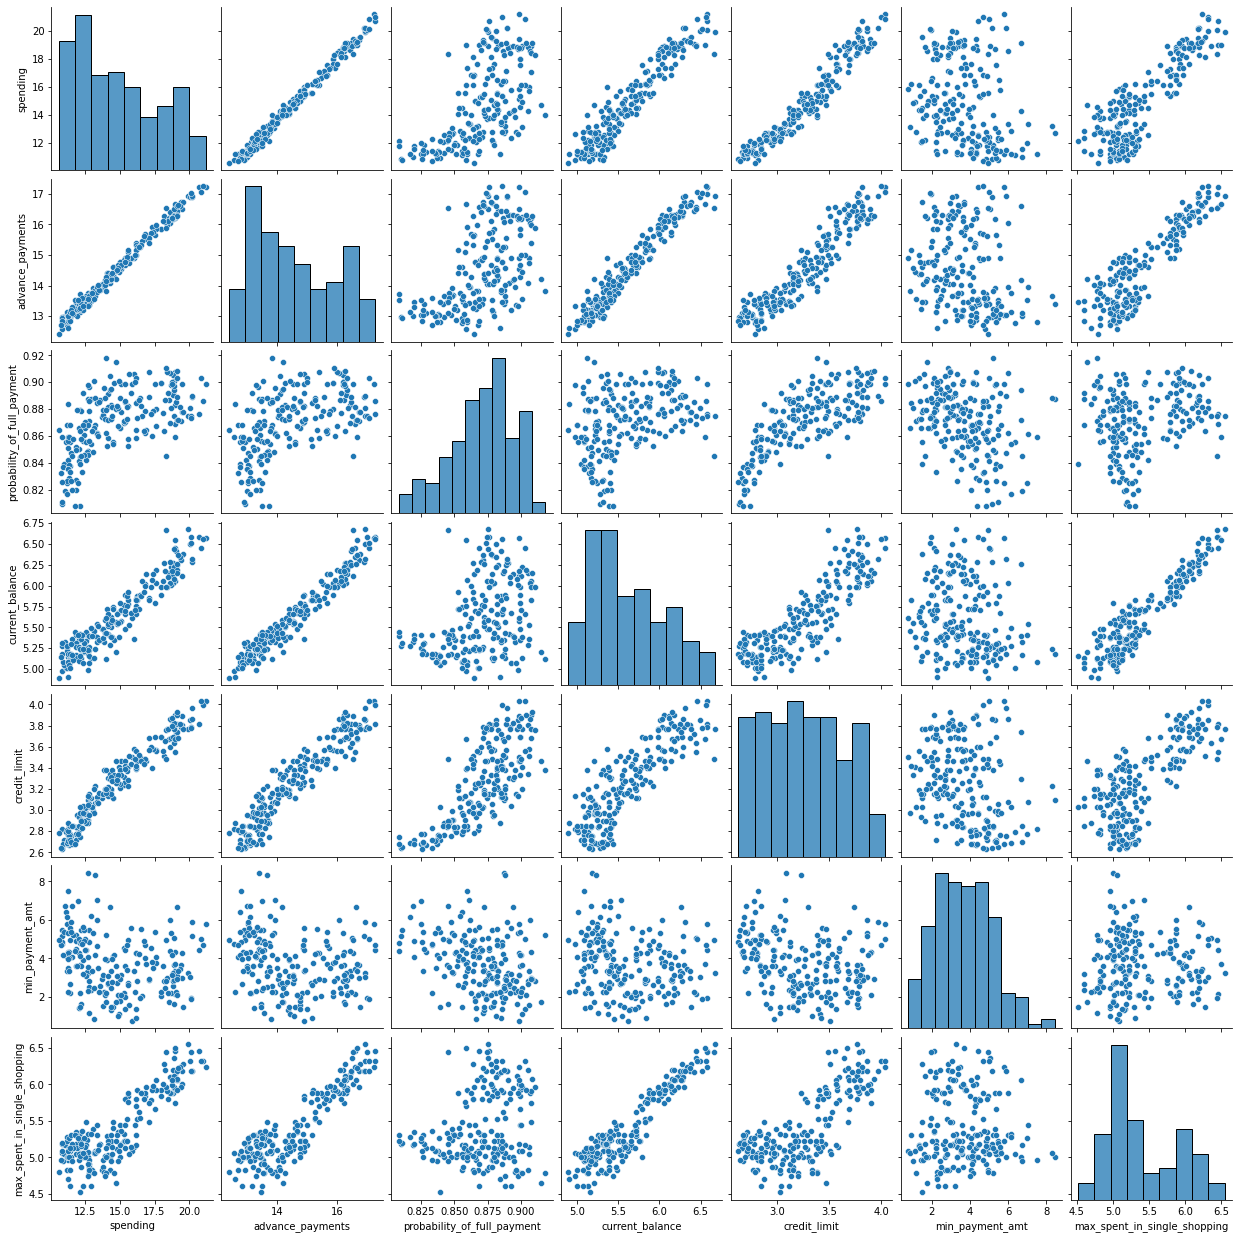

In [10]:
sns.pairplot(df)

<AxesSubplot:>

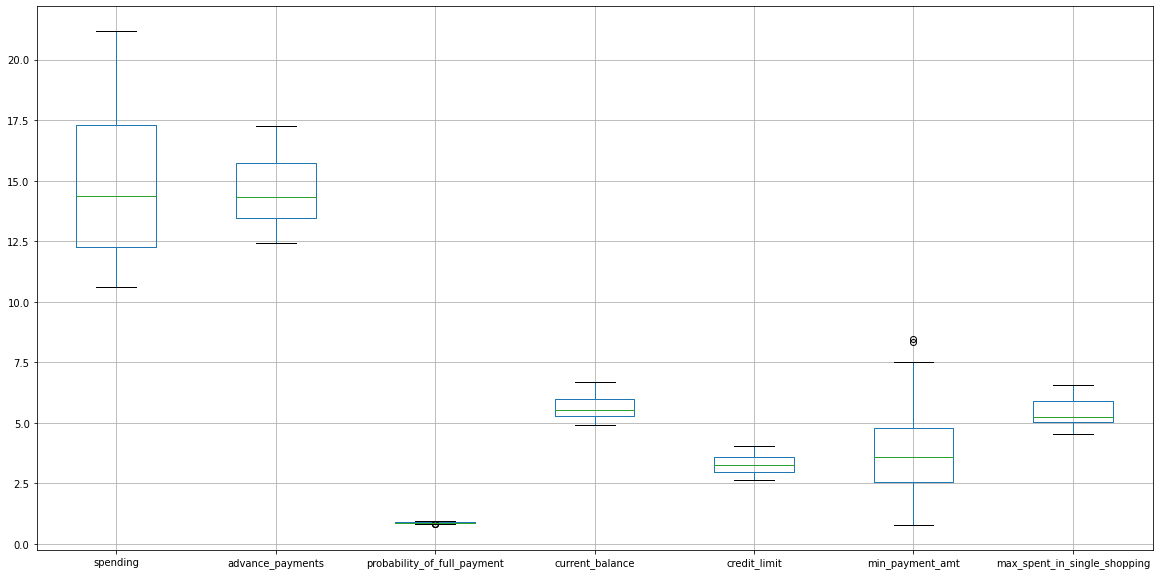

In [11]:
plt.figure(figsize=(20,10))
df.boxplot()

<AxesSubplot:>

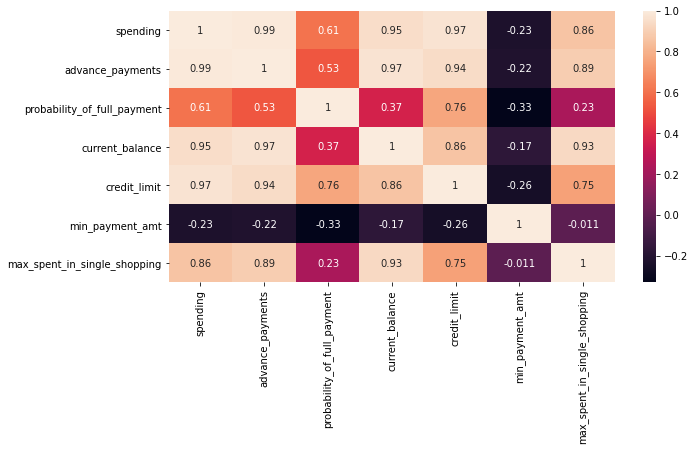

In [12]:
corr=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)

### 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc= StandardScaler()
scaled_df=pd.DataFrame(sc.fit_transform(df))
scaled_df.columns=['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping']

In [15]:
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


<AxesSubplot:>

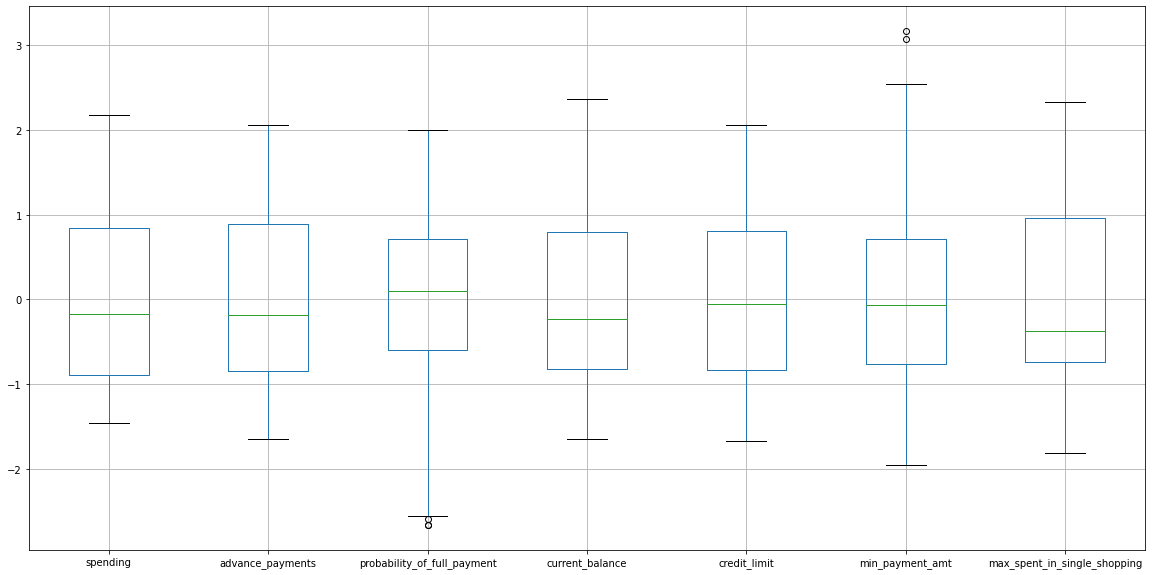

In [16]:
plt.figure(figsize=(20,10))
scaled_df.boxplot()

Yes, scaling is necessary for clustering as it uses Distance based computation to group and form clusters. If the different variables would have extreme values and wouldn't be scaled, it might just make the computation difficult. Hence, the variables are scaled so that the clusters can be formed. For example if there are variables of different natures like age and salary, there might be extreme differences since the groupings are distance based.Standardization prevents variables with larger scales from dominating how clusters are defined. It allows all variables to be considered by the algorithm with equal importance.

### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [17]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [18]:
link=linkage(scaled_df,method='ward')

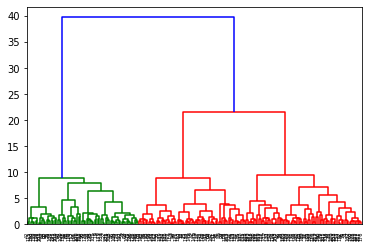

In [19]:
dend=dendrogram(link)

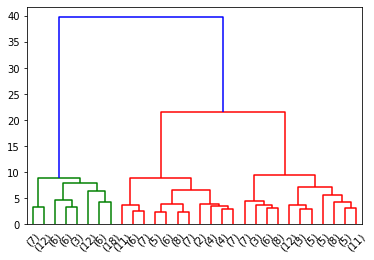

In [20]:
dend1=dendrogram(link,truncate_mode='lastp',p=30)

In [21]:
from scipy.cluster.hierarchy import fcluster

In [22]:
clust=fcluster(link,25,criterion='distance')
clust

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [23]:
df['Cluster_Hierarchy']=clust

In [24]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster_Hierarchy
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


Looking at the dendrogram,3 would be the optimum number of clusters.

### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [25]:
from sklearn.cluster import KMeans

In [26]:
wss=[]

In [27]:
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(scaled_df)
    wss.append(km.inertia_)

In [28]:
wss

[1470.0,
 659.1717544870407,
 430.65897315130053,
 371.65314399951626,
 327.4460581875469,
 293.3961965708889,
 261.9322366324021,
 240.22911516926655,
 221.6177182982202,
 204.93305289269534]

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

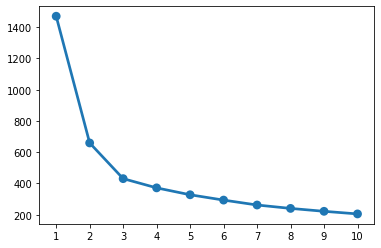

In [29]:
points= [1,2,3,4,5,6,7,8,9,10]
sns.pointplot(points,wss)

In [30]:
k_means=KMeans(n_clusters=3)
k_means.fit(scaled_df)
label=k_means.labels_
label

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [32]:
silhouette_score(scaled_df,label)

0.4007270552751299

In [33]:
silhouette_samples(scaled_df,label)

array([0.57369874, 0.36638639, 0.63778363, 0.51245819, 0.36227633,
       0.21844638, 0.4728666 , 0.36181217, 0.52028453, 0.5325168 ,
       0.46759191, 0.13224116, 0.38966769, 0.5247812 , 0.11221528,
       0.22129574, 0.33795723, 0.49990157, 0.03155344, 0.2357566 ,
       0.35903729, 0.36612754, 0.43277307, 0.26136159, 0.47570507,
       0.06575223, 0.2717924 , 0.50389413, 0.55352814, 0.43430599,
       0.37707319, 0.42823997, 0.38827268, 0.39498208, 0.5345933 ,
       0.55628078, 0.50760384, 0.42334973, 0.50496507, 0.62241469,
       0.56053376, 0.48652307, 0.39923175, 0.61098901, 0.51352958,
       0.37606912, 0.30715373, 0.58258949, 0.48825724, 0.53403992,
       0.31448221, 0.49548458, 0.58601272, 0.59926567, 0.61967102,
       0.23378798, 0.44189877, 0.5384123 , 0.57674252, 0.57696905,
       0.55410258, 0.51383032, 0.55412974, 0.28131787, 0.49622138,
       0.56495699, 0.57828489, 0.5237842 , 0.63205238, 0.08288516,
       0.44353914, 0.32042362, 0.54187254, 0.58284321, 0.29226

In [34]:
df['Cluster_Kmeans']=label
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster_Hierarchy,Cluster_Kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


The optimum number of clusters is 3

### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

#### Profiling on basis of Hierarchical Clustering

In [35]:
df_h=df.drop('Cluster_Kmeans',axis=1)
df_h.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster_Hierarchy
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


#### Cluster Profiles

In [99]:
clusters_h=df_h.groupby('Cluster_Hierarchy').mean()
clusters_h['count']=df_h['Cluster_Hierarchy'].value_counts().sort_index()
clusters_h.T

Cluster_Hierarchy,1,2
spending,18.371429,13.085571
advance_payments,16.145429,13.766214
probability_of_full_payment,0.884400,0.864298
current_balance,6.158171,5.363714
credit_limit,3.684629,3.045593
min_payment_amt,3.639157,3.730723
max_spent_in_single_shopping,6.017371,5.103421
count,70.000000,140.000000


#### Profiling on basis of K-Means Clustering

In [37]:
df_k=df.drop('Cluster_Hierarchy',axis=1)
df_k.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster_Kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


#### Cluster Profiles

In [100]:
clusters_k=df_k.groupby('Cluster_Kmeans').mean()
clusters_k['count']=df_k['Cluster_Kmeans'].value_counts().sort_index()
clusters_k.T

Cluster_Kmeans,0,1,2
spending,11.856944,18.495373,14.437887
advance_payments,13.247778,16.203433,14.337746
probability_of_full_payment,0.848253,0.884210,0.881597
current_balance,5.231750,6.175687,5.514577
credit_limit,2.849542,3.697537,3.259225
min_payment_amt,4.742389,3.632373,2.707341
max_spent_in_single_shopping,5.101722,6.041701,5.120803
count,72.000000,67.000000,71.000000


# Problem 2: CART-RF-ANN

## An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

### Attribute Information:

    1. Target: Claim Status (Claimed)
    2. Code of tour firm (Agency_Code)
    3. Type of tour insurance firms (Type)
    4. Distribution channel of tour insurance agencies (Channel)
    5. Name of the tour insurance products (Product)
    6. Duration of the tour (Duration)
    7. Destination of the tour (Destination)
    8. Amount of sales of tour insurance policies (Sales)
    9. The commission received for tour insurance firm (Commission)
    10. Age of insured (Age)

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

In [39]:
data=pd.read_csv('insurance_part2_data-2.csv')

In [40]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [41]:
data.shape

(3000, 10)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [43]:
data.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [44]:
data.duplicated().sum()

139

In [45]:
data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

<AxesSubplot:>

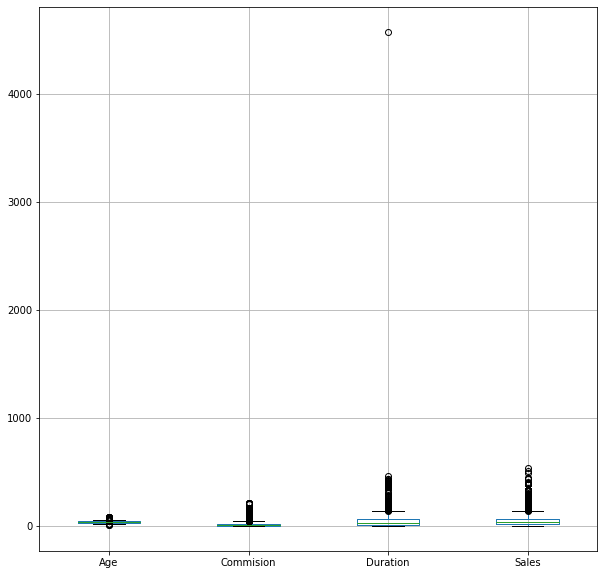

In [46]:
plt.figure(figsize=(10,10))
data.boxplot()

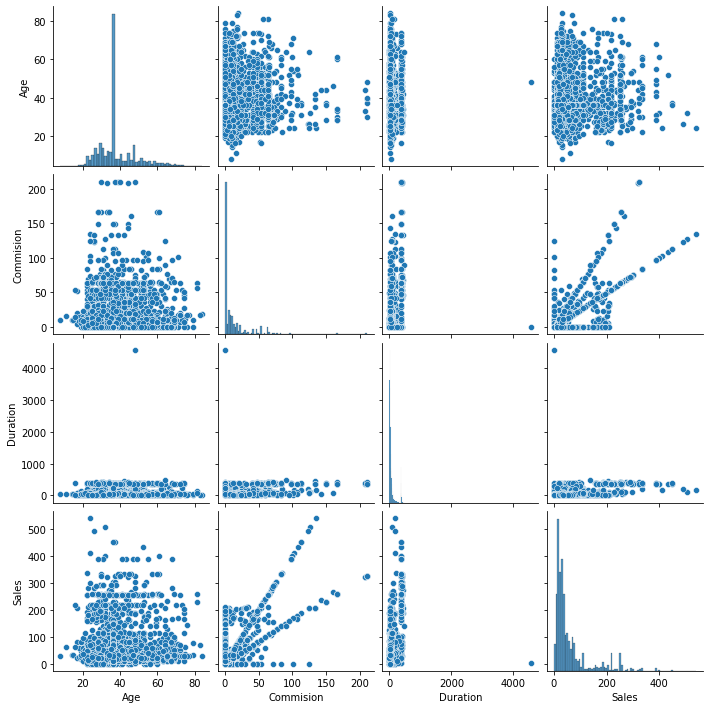

In [47]:
sns.pairplot(data)

<AxesSubplot:>

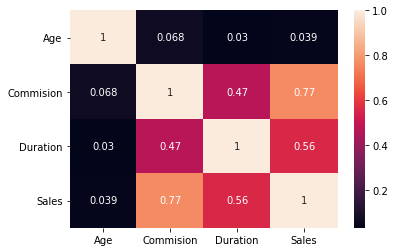

In [48]:
corr=data.corr()
sns.heatmap(corr,annot=True)

C:\Users\aaditya.d\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Destination', ylabel='count'>

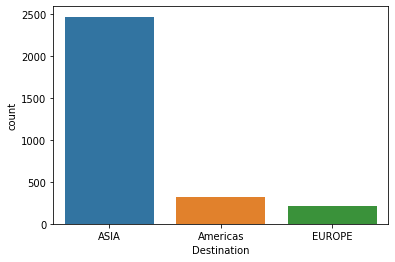

In [49]:
sns.countplot(data.Destination)

<AxesSubplot:xlabel='Agency_Code'>

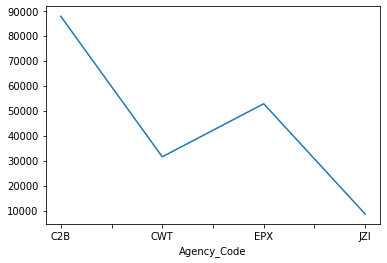

In [50]:
data.groupby(['Agency_Code']).sum()['Sales'].plot()

In [51]:
for i in data.columns :
    if data[i].dtype=='object':
        print('\n')
        print('feature:',i)
        print(pd.Categorical(data[i].unique()))
        print(pd.Categorical(data[i].unique()).codes)
        data[i]=pd.Categorical(data[i]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [52]:
data.sample(5)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1185,30,0,0,0,46.25,1,167,185.0,0,0
707,36,3,0,0,12.25,1,42,35.0,0,0
1079,37,1,1,0,210.21,1,364,323.4,3,1
2158,28,0,0,0,4.63,1,17,18.5,4,0
704,61,3,0,0,9.10,1,8,26.0,0,0


### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network
### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

In [53]:
x= data.drop('Claimed',axis=1)
y= data.pop('Claimed')

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.20, random_state=1)

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

### CART Model

In [56]:
cart=DecisionTreeClassifier(criterion = 'gini' )

In [57]:
cart.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('Y_train',Y_train.shape)
print('Y_test',Y_test.shape)

X_train (2400, 9)
X_test (600, 9)
Y_train (2400,)
Y_test (600,)


In [59]:
reg_cart = DecisionTreeClassifier(criterion = 'gini', max_depth = 30,min_samples_leaf=100,min_samples_split=1000,random_state=1)
reg_cart.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=1000,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [60]:
from sklearn import tree

In [61]:
train_char_label = ['No', 'Yes']
Cart_Tree_File = open('Cart_Tree_File.dot','w')
dot_data = tree.export_graphviz(reg_cart, 
                                out_file=Cart_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

Cart_Tree_File.close()

In [62]:
a=pd.DataFrame(reg_cart.feature_importances_,columns=['Feature_Importance'],index=X_train.columns)
a

,Feature_Importance
Age,0.000000
Agency_Code,0.894961
Type,0.000000
Commision,0.000000
Channel,0.000000
Duration,0.000000
Sales,0.000000
Product Name,0.105039
Destination,0.000000


In [63]:
y_train_predict=reg_cart.predict(X_train)
y_test_predict=reg_cart.predict(X_test)

In [64]:
print('Y_Train_Predict :\n',y_train_predict)
print('\n')
print('Y_Test_Predict :\n',y_test_predict)

Y_Train_Predict :
 [1 0 0 ... 0 0 1]


Y_Test_Predict :
 [0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0
 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 

In [65]:
y_train_prob=reg_cart.predict_proba(X_train)
y_test_prob=reg_cart.predict_proba(X_test)

In [66]:
print('Y_Train_Predict_Probability :\n',y_train_prob)
print('\n')
print('Y_Test_Predict_Probability :\n',y_test_prob)

Y_Train_Predict_Probability :
 [[0.40078844 0.59921156]
 [0.7530454  0.2469546 ]
 [0.7530454  0.2469546 ]
 ...
 [0.7530454  0.2469546 ]
 [0.91847826 0.08152174]
 [0.40078844 0.59921156]]


Y_Test_Predict_Probability :
 [[0.91847826 0.08152174]
 [0.40078844 0.59921156]
 [0.40078844 0.59921156]
 ...
 [0.91847826 0.08152174]
 [0.7530454  0.2469546 ]
 [0.40078844 0.59921156]]


#### Training Set ROC and AUC

AUC for Train set: 0.761


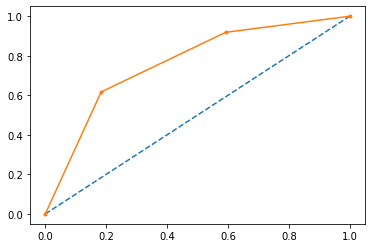

In [67]:
# predict probabilities
probs = reg_cart.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
print('AUC for Train set: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Test Set ROC and AUC

AUC for Test set: 0.764


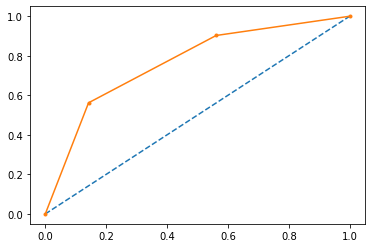

In [68]:
# predict probabilities
probs = reg_cart.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
print('AUC for Test set: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [69]:
from sklearn.metrics import classification_report,confusion_matrix

#### Classification Report for Training and Test Sets

In [70]:
print('Classification Report for Training Data')
print(classification_report(Y_train, y_train_predict))
print('\n')
print('Classification Report for Testing Data')
print(classification_report(Y_test, y_test_predict))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1661
           1       0.60      0.62      0.61       739

    accuracy                           0.76      2400
   macro avg       0.71      0.72      0.71      2400
weighted avg       0.76      0.76      0.76      2400



Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       415
           1       0.64      0.56      0.60       185

    accuracy                           0.77       600
   macro avg       0.73      0.71      0.72       600
weighted avg       0.76      0.77      0.76       600



#### Confusion Matrix for Training and Test data

In [71]:
print('Confusion Matrix for Training Data')
print(confusion_matrix(Y_train, y_train_predict))
print('\n')
print('Confusion Matrix for Testing Data')
print(confusion_matrix(Y_test, y_test_predict))

Confusion Matrix for Training Data
[[1356  305]
 [ 283  456]]


Confusion Matrix for Testing Data
[[356  59]
 [ 81 104]]


#### Accuracy for Training and Test data

In [72]:
print('Accuracy for Training data :',reg_cart.score(X_train,Y_train))
print('Accuracy for Testing data :',reg_cart.score(X_test,Y_test))

Accuracy for Training data : 0.755
Accuracy for Testing data : 0.7666666666666667


### Random Forest

Since we have already split the data and classified our dependant and independant variable, we can now directly build the model

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid = {
    'max_depth': [3,6,9,12],
    'max_features': [5,7,9],
    'min_samples_leaf': [4,7,10],
    'min_samples_split': [50,80,110],
    'n_estimators': [101,301,501]
}
rfcl = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv =5)

In [75]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [76]:
grid_search.best_params_

{'max_depth': 12,
 'max_features': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 80,
 'n_estimators': 101}

In [77]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=80,
                       min_weight_fraction_leaf=0.0, n_estimators=101,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [78]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

#### Classification Report

In [79]:
print('Classification Report for Training Data')
print(classification_report(Y_train, ytrain_predict))
print('\n')
print('Classification Report for Testing Data')
print(classification_report(Y_test, ytest_predict))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1661
           1       0.72      0.61      0.66       739

    accuracy                           0.81      2400
   macro avg       0.78      0.75      0.76      2400
weighted avg       0.80      0.81      0.80      2400



Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       415
           1       0.71      0.51      0.59       185

    accuracy                           0.79       600
   macro avg       0.76      0.71      0.72       600
weighted avg       0.78      0.79      0.77       600



#### Confusion Matrix

In [80]:
print('Confusion Matrix for Training Data')
print(confusion_matrix(Y_train, ytrain_predict))
print('\n')
print('Confusion Matrix for Testing Data')
print(confusion_matrix(Y_test, ytest_predict))

Confusion Matrix for Training Data
[[1487  174]
 [ 286  453]]


Confusion Matrix for Testing Data
[[377  38]
 [ 91  94]]


#### Training Set ROC and AUC

AUC for Train set: 0.864


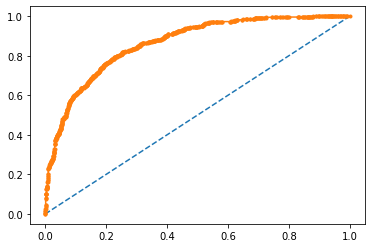

In [81]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC for Train set: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Testing Set ROC and AUC

AUC for Test set: 0.825


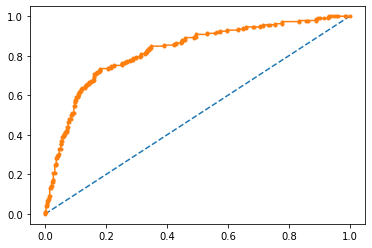

In [82]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_test, probs)
print('AUC for Test set: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### ANN

In [83]:
anndf=pd.read_csv('insurance_part2_data-2.csv')
anndf.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [84]:
for i in anndf.columns :
    if anndf[i].dtype=='object' :
        anndf[i]=pd.Categorical(anndf[i]).codes

In [85]:
X=anndf.drop('Claimed',axis=1)
Y=anndf.pop('Claimed')

In [86]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=27)

In [87]:
sc=StandardScaler()

In [88]:
x_train=sc.fit_transform(xtrain)
x_test=sc.transform(xtest)

In [89]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu','tanh'],
    'solver': ['sgd', 'adam'],
    'max_iter' : [50000],
    'tol': [0.1,0.01,0.001],
}

In [90]:
anncl = MLPClassifier()
grid_search = GridSearchCV(estimator = anncl, param_grid = param_grid, cv = 5)

In [91]:
grid_search.fit(x_train,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': [

In [92]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 50000,
 'solver': 'adam',
 'tol': 0.01}

In [93]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.01, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [94]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

#### Classification Report

In [95]:
print('Classification Report for Training Data')
print(classification_report(ytrain, ytrain_predict))
print('\n')
print('Classification Report for Testing Data')
print(classification_report(ytest, ytest_predict))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1642
           1       0.66      0.65      0.65       758

    accuracy                           0.78      2400
   macro avg       0.75      0.75      0.75      2400
weighted avg       0.78      0.78      0.78      2400



Classification Report for Testing Data
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       434
           1       0.60      0.66      0.63       166

    accuracy                           0.79       600
   macro avg       0.73      0.75      0.74       600
weighted avg       0.79      0.79      0.79       600



#### Confusion Matrix

In [96]:
print('Confusion Matrix for Training Data')
print(confusion_matrix(ytrain, ytrain_predict))
print('\n')
print('Confusion Matrix for Testing Data')
print(confusion_matrix(ytest, ytest_predict))

Confusion Matrix for Training Data
[[1392  250]
 [ 268  490]]


Confusion Matrix for Testing Data
[[361  73]
 [ 56 110]]


#### Training Set ROC and AUC

AUC for Train set: 0.838


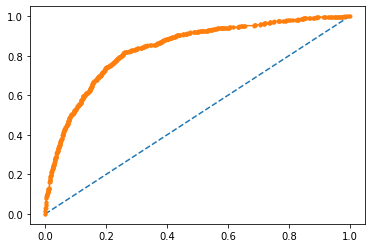

In [101]:
# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(ytrain, probs)
print('AUC for Train set: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Testing Set ROC and AUC

AUC for Test set: 0.812


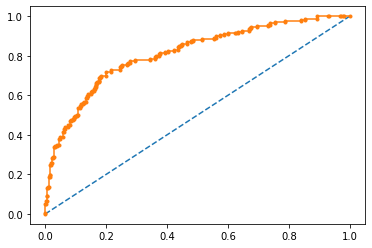

In [98]:
# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(ytest, probs)
print('AUC for Test set: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()